In [53]:
 #IPython notebook中的魔法方法，这样每次运行后可以直接得到图像，不再需要使用plt.show()
import numpy as np  #导入numpy包，用于生成数组
import pandas as pd
import seaborn as sns  #习惯上简写成snssns.set()    
import matplotlib.pyplot as plt
sns.set()#切换到seaborn的默认运行配置
%matplotlib inline

In [3]:
x=np.random.randn(100)  #随机生成100个符合正态分布的数sns.kdeplot(x)

# kdeplot(核密度估计图)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


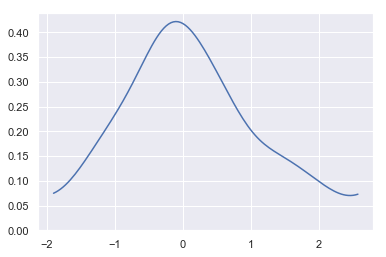

In [4]:

sns.kdeplot(x,cut=0) #cut：参数表示绘制的时候，切除带宽往数轴极限数值的多少(默认为3)

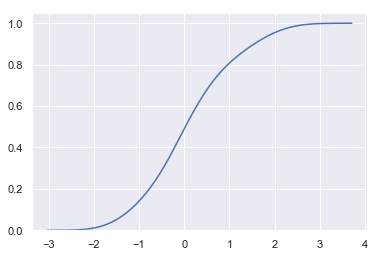

In [5]:
 #cumulative ：是否绘制累积分布
sns.kdeplot(x,cumulative=True)

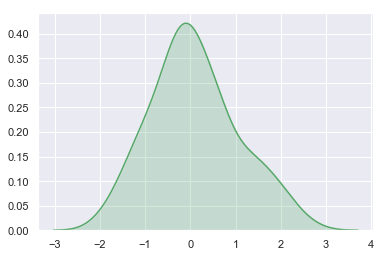

In [6]:
#shade：若为True，则在kde曲线下面的区域中进行阴影处理，color控制曲线及阴影的颜色
sns.kdeplot(x,shade=True,color="g") 

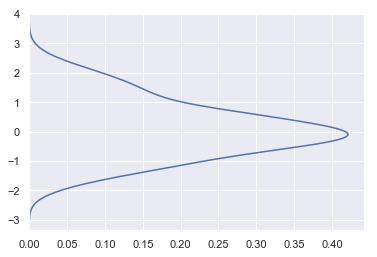

In [7]:
#vertical：表示以X轴进行绘制还是以Y轴进行绘制
sns.kdeplot(x,vertical=True) 

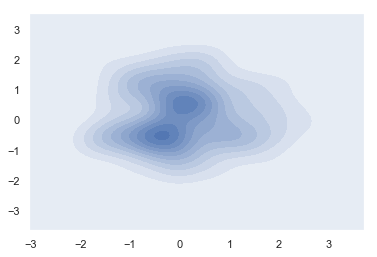

In [8]:
#二元kde图像
y=np.random.randn(100)
sns.kdeplot(x,y,shade=True)

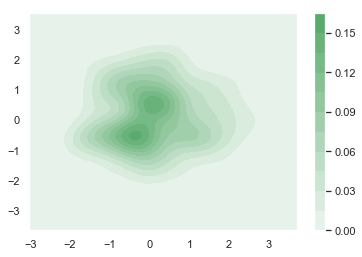

In [13]:
#cbar：参数若为True，则会添加一个颜色棒(颜色帮在二元kde图像中才有)
sns.kdeplot(x,y,shade=True,cbar=True, color = 'g')

# distplot

displot()集合了matplotlib的hist()与核函数估计kdeplot的功能，增加了rugplot分布观测条显示与利用scipy库fit拟合参数分布的新颖用途

In [ ]:
#seaborn.distplot(a, bins=None, hist=True, kde=True, 
# rug=False, fit=None, hist_kws=None, kde_kws=None, 
# rug_kws=None, fit_kws=None, color=None, vertical=False, 
# norm_hist=False, axlabel=None, label=None, ax=None)

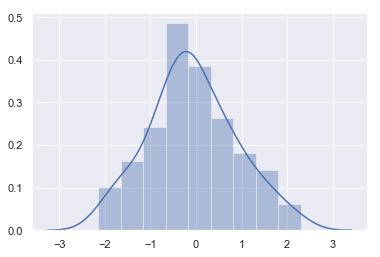

In [33]:
x = np.random.randn(100)
sns.distplot(x, kde = True)

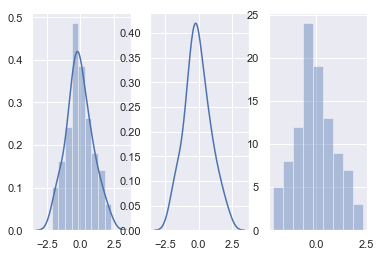

In [34]:
#通过hist和kde参数调节是否显示直方图及核密度估计(默认hist,kde均为True)
import matplotlib.pyplot as plt
fig,axes=plt.subplots(1,3) #创建一个一行三列的画布
sns.distplot(x,ax=axes[0]) #左图
sns.distplot(x,hist=False,ax=axes[1]) #中图
sns.distplot(x,kde=False,ax=axes[2]) #右图

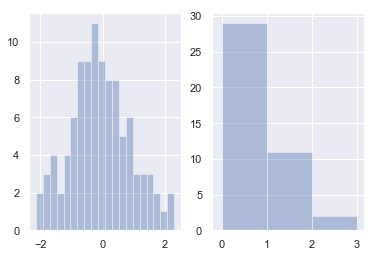

In [35]:
#bins：int或list，控制直方图的划分
fig,axes=plt.subplots(1,2) 
sns.distplot(x,kde=False,bins=20,ax=axes[0]) #左图：分成20个区间
sns.distplot(x,kde=False,bins=[x for x in range(4)],ax=axes[1]) #右图：以0,1,2,3为分割点，形成区间[0,1],[1,2],[2,3]，区间外的值不计入。

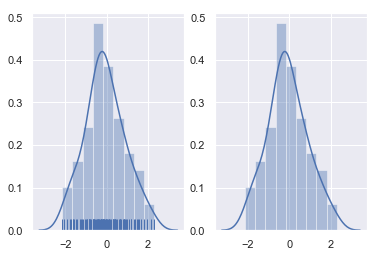

In [36]:
#rag：控制是否生成观测数值的小细条
fig,axes=plt.subplots(1,2)
sns.distplot(x,rug=True,ax=axes[0]) #左图
sns.distplot(x,ax=axes[1]) #右图

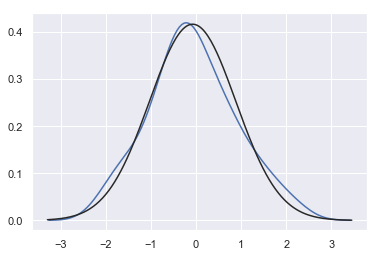

In [37]:
#fit：控制拟合的参数分布图形，能够直观地评估它与观察数据的对应关系(黑色线条为确定的分布)
from scipy.stats import *
sns.distplot(x,hist=False,fit=norm) #拟合标准正态分布

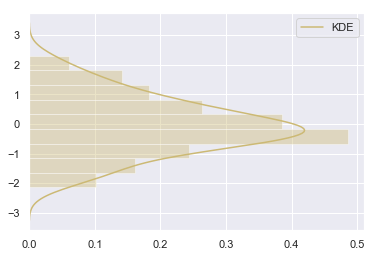

In [38]:
#hist_kws, kde_kws, rug_kws, fit_kws参数接收字典类型，可以自行定义更多高级的样式
sns.distplot(x,kde_kws={"label":"KDE"},vertical=True,color="y")

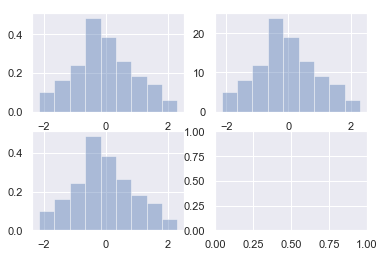

In [48]:
#norm_hist：若为True, 则直方图高度显示密度而非计数(含有kde图像中默认为True)
fig,axes=plt.subplots(2,2)
sns.distplot(x,norm_hist=True,kde=False,ax=axes[0][0]) #左图
sns.distplot(x,kde=False,ax=axes[0][1]) #右图
sns.distplot(x,norm_hist=True,kde=False,ax=axes[1][0]) #左图

# Heatmap

In [51]:
# np.corrcoef(a)可计算行与行之间的相关系数 
# np.corrcoef(a,rowvar=0)用于计算列与列之间的相关系数

a=np.array([[1, 1, 2, 2, 3],  
            [2, 2, 3, 3, 5],  
            [1, 4, 2, 2, 3]]) 

np.corrcoef(a)
np.corrcoef(a,rowvar=0)
#应用公式0.5*value+0.5可以将相关系数矩阵的值域由[-1,1]映射为[0,1]
np.corrcoef(a,rowvar=0)*0.5+0.5 

array([[1.        , 0.40550888, 1.        , 1.        , 1.        ],
       [0.40550888, 1.        , 0.40550888, 0.40550888, 0.40550888],
       [1.        , 0.40550888, 1.        , 1.        , 1.        ],
       [1.        , 0.40550888, 1.        , 1.        , 1.        ],
       [1.        , 0.40550888, 1.        , 1.        , 1.        ]])

#data:矩阵数据集，可以是numpy的数组（array），也可以是pandas的DataFrame。如果是DataFrame，则df的index/column信息会分别对应到heatmap的columns和rows，即pt.index是热力图的行标，pt.columns是热力图的列标

热力图矩阵块颜色参数: 
vmax,vmin:分别是热力图的颜色取值最大和最小范围，默认是根据data数据表里的取值确定 
cmap:从数字到色彩空间的映射，取值是matplotlib包里的colormap名称或颜色对象，或者表示颜色的列表；改参数默认值：根据center参数设定 
center:数据表取值有差异时，设置热力图的色彩中心对齐值；通过设置center值，可以调整生成的图像颜色的整体深浅；设置center数据时，如果有数据溢出，则手动设置的vmax、vmin会自动改变 
robust:默认取值False；如果是False，且没设定vmin和vmax的值，热力图的颜色映射范围根据具有鲁棒性的分位数设定，而不是用极值设定

热力图矩阵块注释参数: 
annot(annotate的缩写):默认取值False；如果是True，在热力图每个方格写入数据；如果是矩阵，在热力图每个方格写入该矩阵对应位置数据 
fmt:字符串格式代码，矩阵上标识数字的数据格式，比如保留小数点后几位数字 
annot_kws:默认取值False；如果是True，设置热力图矩阵上数字的大小颜色字体，matplotlib包text类下的字体设置；官方文档：https://matplotlib.org/api/text_api.html#matplotlib.text.Text

热力图矩阵块之间间隔及间隔线参数： 
linewidths:定义热力图里“表示两两特征关系的矩阵小块”之间的间隔大小 
linecolor:切分热力图上每个矩阵小块的线的颜色，默认值是’white’

热力图颜色刻度条参数： 
cbar:是否在热力图侧边绘制颜色刻度条，默认值是True 
cbar_kws:热力图侧边绘制颜色刻度条时，相关字体设置，默认值是None 
cbar_ax:热力图侧边绘制颜色刻度条时，刻度条位置设置，默认值是None

square:设置热力图矩阵小块形状，默认值是False 
xticklabels, yticklabels:xticklabels控制每列标签名的输出；yticklabels控制每行标签名的输出。默认值是auto。如果是True，则以DataFrame的列名作为标签名。如果是False，则不添加行标签名。如果是列表，则标签名改为列表中给的内容。如果是整数K，则在图上每隔K个标签进行一次标注。 如果是auto，则自动选择标签的标注间距，将标签名不重叠的部分(或全部)输出 
mask:控制某个矩阵块是否显示出来。默认值是None。如果是布尔型的DataFrame，则将DataFrame里True的位置用白色覆盖掉 
ax:设置作图的坐标轴，一般画多个子图时需要修改不同的子图的该值

In [55]:
region = ['Azerbaijan','Bahamas', 'Bangladesh', 'Belize', 'Bhutan',
          'Cambodia', 'Cameroon', 'Cape Verde', 'Chile', 'China']   #10个

kind = ['Afforestation & reforestation', 'Biofuels', 'Biogas', 'Biomass', 'Cement']   #5个

np.random.seed(20180316)
arr_region = np.random.choice(region, size=(200,))
list_region = list(arr_region)

arr_kind = np.random.choice(kind, size=(200,))
list_kind = list(arr_kind)

values = np.random.randint(100, 200, 200)
list_values = list(values)

df = pd.DataFrame({'region':list_region,'kind': list_kind,'values':list_values})

In [56]:
df['kind'].value_counts()

Cement                           47
Biogas                           44
Biofuels                         41
Afforestation & reforestation    38
Biomass                          30
Name: kind, dtype: int64

In [57]:
#将DataFrame数据表转化成“数据透视表”
pt = df.pivot_table(index='kind', columns='region', values='values', aggfunc=np.sum)   #数据透视表
pt   #index是行，columns是列，values是表中展示的数据，aggfunc是表中展示每组数据使用的运算

region,Azerbaijan,Bahamas,Bangladesh,Belize,Bhutan,Cambodia,Cameroon,Cape Verde,Chile,China
kind,,,,,,,,,,
Afforestation & reforestation,568,571,183,617,1161,939,251,471,225,608
Biofuels,515,903,410,471,325,832,636,1060,313,782
Biogas,499,614,976,437,374,990,888,1276,715,130
Biomass,834,153,317,904,739,532,153,155,164,749
Cement,431,549,469,610,835,974,1077,1103,194,747


Text(84.49999999999999, 0.5, 'kind')

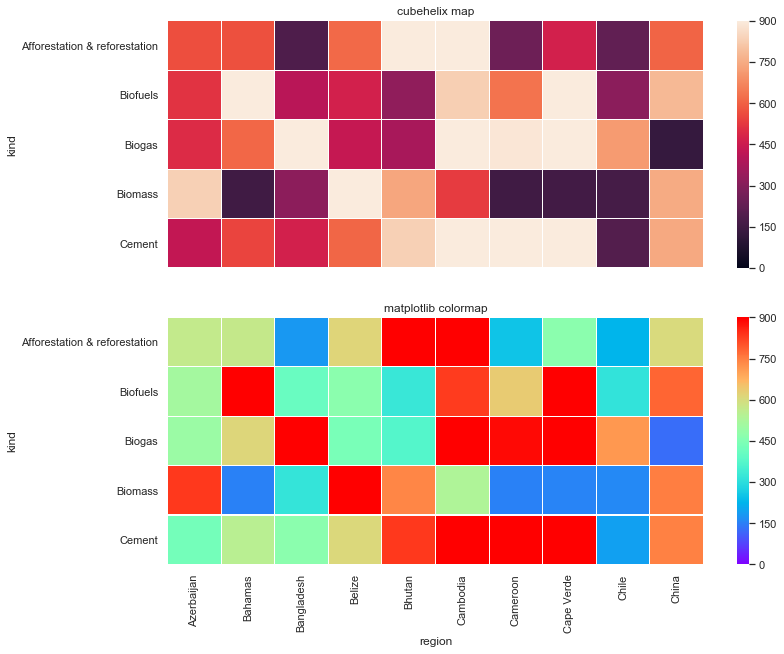

In [64]:
#cmap(颜色)

f, (ax1,ax2) = plt.subplots(figsize = (12,10),nrows=2)

# cmap用cubehelix map颜色
#cmap = sns.cubehelix_palette(start = 1.5, rot = 3, gamma=0.8, as_cmap = True)

#sns.heatmap(pt, linewidths = 0.05,ax = ax1, vmax=900, vmin=0, cmap=cmap)

sns.heatmap(pt, linewidths = 0.05,ax = ax1, vmax=900, vmin=0)
ax1.set_title('cubehelix map')
ax1.set_xlabel('')
ax1.set_xticklabels([]) #设置x轴图例为空值
ax1.set_ylabel('kind')

# cmap用matplotlib colormap
sns.heatmap(pt, linewidths = 0.05, ax = ax2, vmax=900, vmin=0, cmap='rainbow') 
# rainbow为 matplotlib 的colormap名称
ax2.set_title('matplotlib colormap')
ax2.set_xlabel('region')
ax2.set_ylabel('kind')

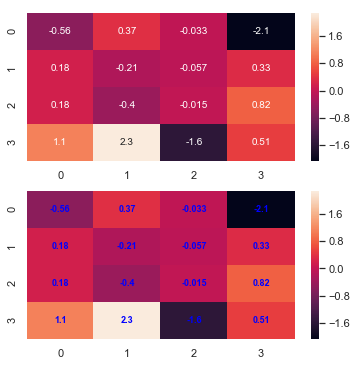

In [65]:
# 修改字体
np.random.seed(20180316)
x = np.random.randn(4, 4)

f, (ax1, ax2) = plt.subplots(figsize=(6,6),nrows=2)

sns.heatmap(x, annot=True, ax=ax1)

sns.heatmap(x, annot=True, ax=ax2, annot_kws={'size':9,'weight':'bold', 'color':'blue'})

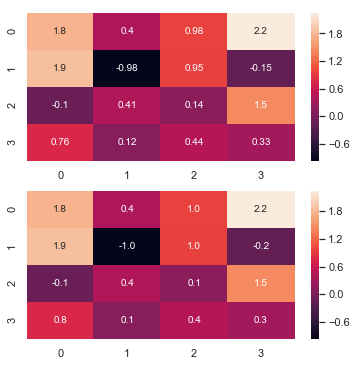

In [66]:
#fmt(字符串格式代码，矩阵上标识数字的数据格式，比如保留小数点后几位数字)
np.random.seed(0)
x = np.random.randn(4,4)

f, (ax1, ax2) = plt.subplots(figsize=(6,6),nrows=2)

sns.heatmap(x, annot=True, ax=ax1)

sns.heatmap(x, annot=True, fmt='.1f', ax=ax2)

Text(30.499999999999993, 0.5, 'kind')

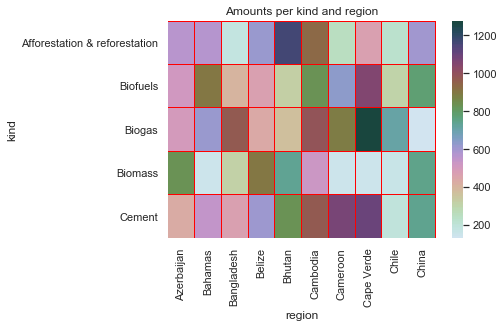

In [67]:
#linewidths(矩阵小块的间隔),linecolor(切分热力图矩阵小块的线的颜色)

import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize = (6,4))
cmap = sns.cubehelix_palette(start = 1, rot = 3, gamma=0.8, as_cmap = True)   
sns.heatmap(pt, cmap = cmap, linewidths = 0.05, linecolor= 'red', ax = ax)   
ax.set_title('Amounts per kind and region')
ax.set_xlabel('region')
ax.set_ylabel('kind')

Text(111.49999999999999, 0.5, 'kind')

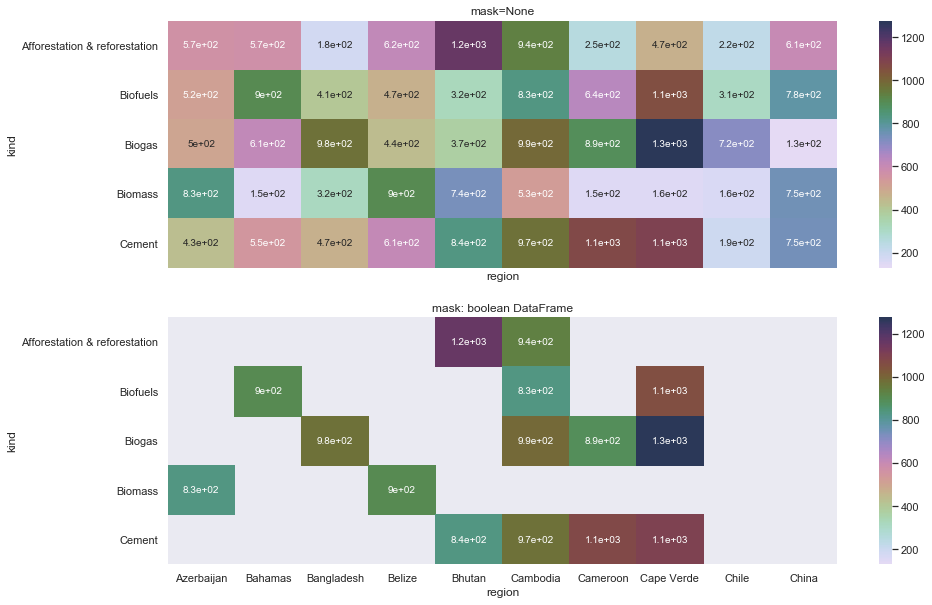

In [71]:
#mask对某些矩阵块的显示进行覆盖

f, (ax1,ax2) = plt.subplots(figsize = (15,10),nrows=2)

cmap = sns.cubehelix_palette(start = 1.5, rot = 3, gamma=0.8, as_cmap = True)

p1 = sns.heatmap(pt, ax=ax1, cmap=cmap, annot = True, xticklabels=False, mask=None)
ax1.set_title('mask=None')
ax1.set_ylabel('kind')

p2 = sns.heatmap(pt, ax=ax2, annot = True, cmap=cmap, xticklabels=True, mask=(pt<800))   
#mask对pt进行布尔型转化,结果为True的位置用白色覆盖
ax2.set_title('mask: boolean DataFrame')
ax2.set_xlabel('region')
ax2.set_ylabel('kind')

In [ ]:
#用 mask突出某些数据

f,(ax1,ax2) = plt.subplots(figsize=(4,6),nrows=2)
x = np.array([[1,2,3],[2,0,1],[-1,-2,0]])
sns.heatmap(x, annot=True, ax=ax1)
sns.heatmap(x, mask=x < 1, ax=ax2, annot=True, annot_kws={"weight": "bold"})   #把小于1的区域覆盖掉

# HIST